<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/sentiment_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df = pd.read_csv("sentiment-analysis.csv")

In [ ]:
df.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


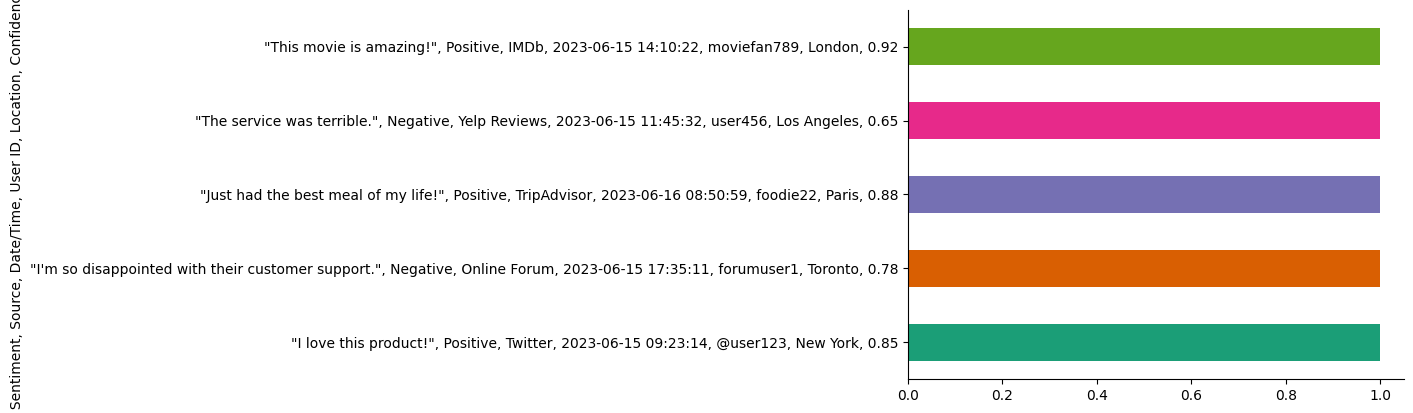

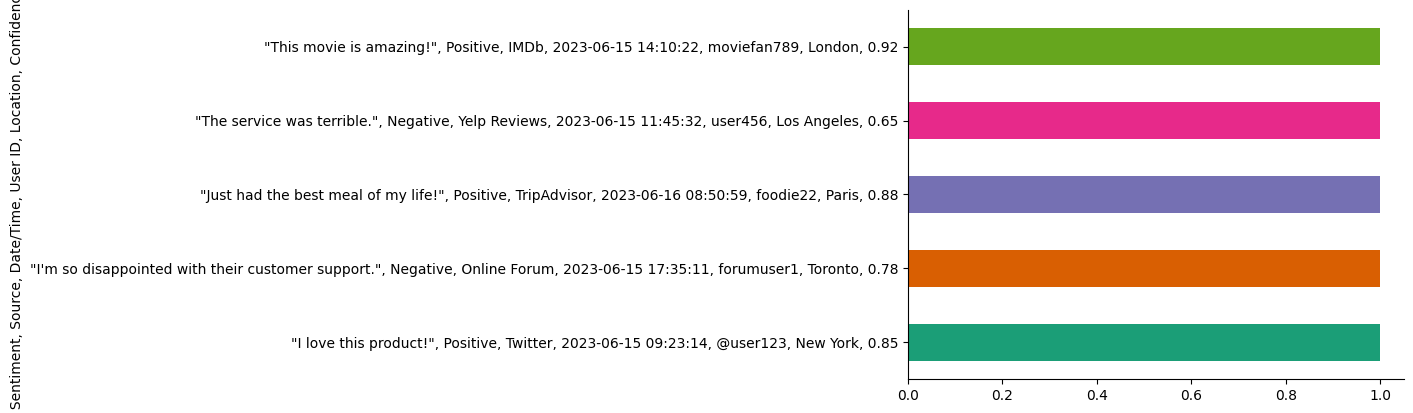

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(98, 1)

(98, 1)

In [ ]:
df.dtypes

,0
"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score",object


,0
"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score",object


In [ ]:

# Split the column and create new columns
df[['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']] = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(', ', expand=True)

# Drop the original combined column if you don't need it anymore
df = df.drop('Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score', axis=1)

df.head()


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [ ]:
df.shape

(98, 7)

(98, 7)

In [ ]:
df['Text'] = df['Text'].str.replace('"', '')

df.head()


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


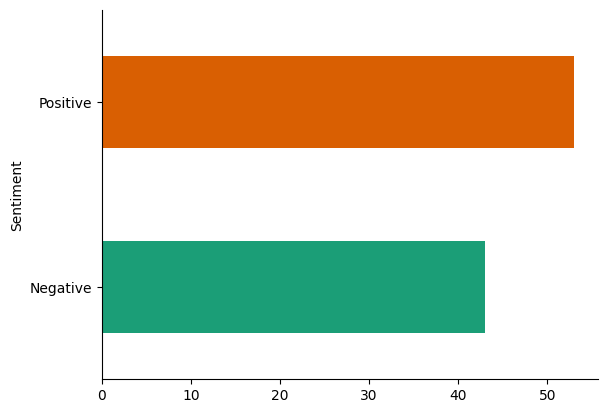

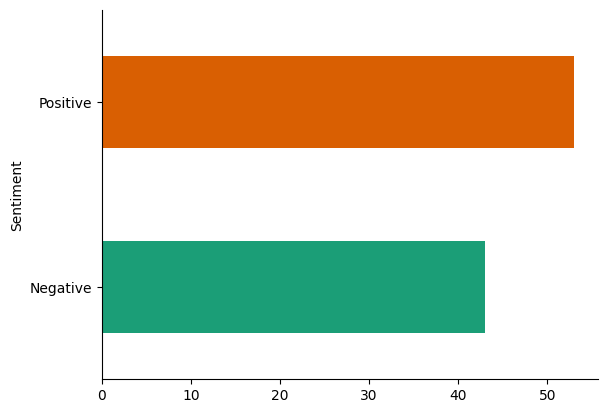

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

,0
Text,2
Sentiment,2
Source,2
Date/Time,2
User ID,2
Location,2
Confidence Score,2


,0
Text,2
Sentiment,2
Source,2
Date/Time,2
User ID,2
Location,2
Confidence Score,2


In [ ]:
# create a dataframe with the columns Text	Sentiment only

new_df = df[['Text', 'Sentiment']]
new_df.head()


,Text,Sentiment
0,I love this product!,Positive
1,The service was terrible.,Negative
2,This movie is amazing!,Positive
3,I'm so disappointed with their customer support.,Negative
4,Just had the best meal of my life!,Positive


,Text,Sentiment
0,I love this product!,Positive
1,The service was terrible.,Negative
2,This movie is amazing!,Positive
3,I'm so disappointed with their customer support.,Negative
4,Just had the best meal of my life!,Positive


In [ ]:
new_df.dtypes

,0
Text,object
Sentiment,object


,0
Text,object
Sentiment,object


In [ ]:
new_df["Sentiment"].unique()

array(['Positive', 'Negative', nan], dtype=object)

array(['Positive', 'Negative', nan], dtype=object)

In [ ]:
new_df.shape

(98, 2)

(98, 2)

In [ ]:
new_df.isnull().sum()

,0
Text,2
Sentiment,2


,0
Text,2
Sentiment,2


In [ ]:
new_df.dropna(inplace=True)

<ipython-input-70-ca20e18b38b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)
<ipython-input-93-ca20e18b38b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [ ]:
new_df.shape

(96, 2)

(96, 2)

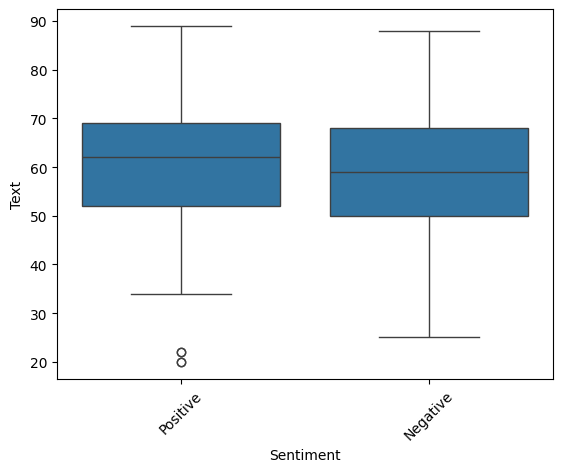

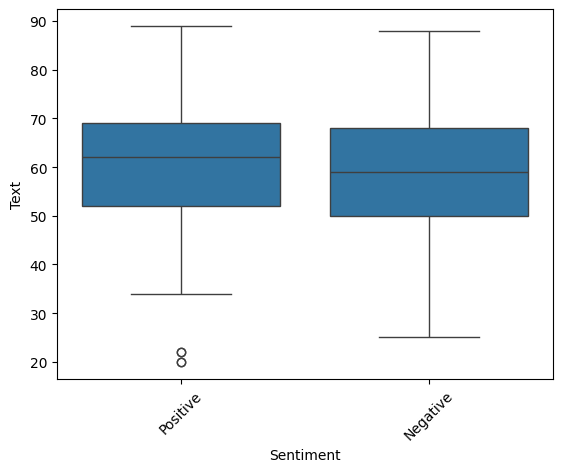

In [ ]:
# checking for outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Sentiment', y=new_df['Text'].apply(len), data=new_df)
plt.xticks(rotation=45)
plt.show()


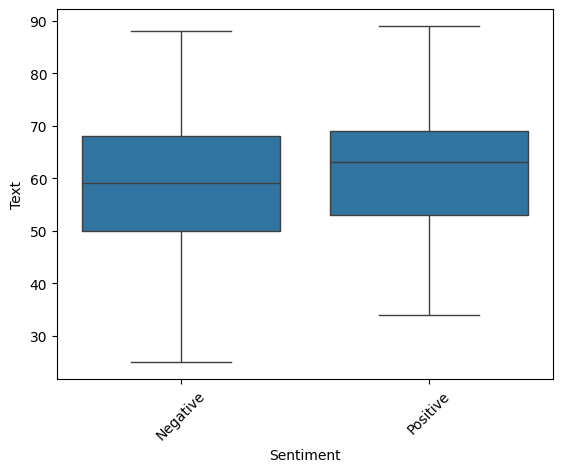

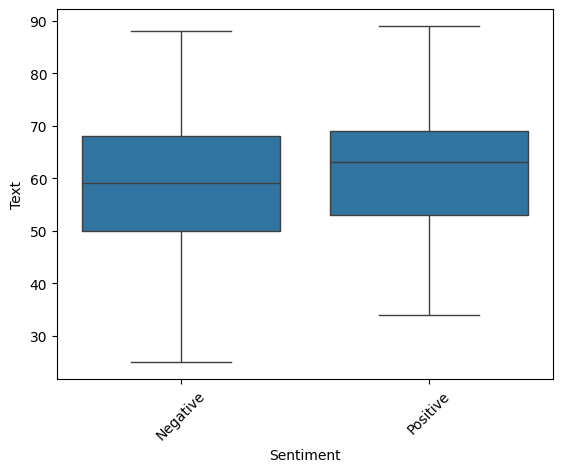

In [ ]:
# prompt: drop the outliers and draw the diagram again

# Calculate IQR for text length
Q1 = new_df['Text'].apply(len).quantile(0.25)
Q3 = new_df['Text'].apply(len).quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
new_df = new_df[(new_df['Text'].apply(len) >= lower_bound) & (new_df['Text'].apply(len) <= upper_bound)]

# Redraw the boxplot
sns.boxplot(x='Sentiment', y=new_df['Text'].apply(len), data=new_df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
new_df.shape

(92, 2)

(92, 2)

In [ ]:

# Check for duplicate rows
duplicate_rows = new_df[new_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 19
Number of duplicate rows: 19


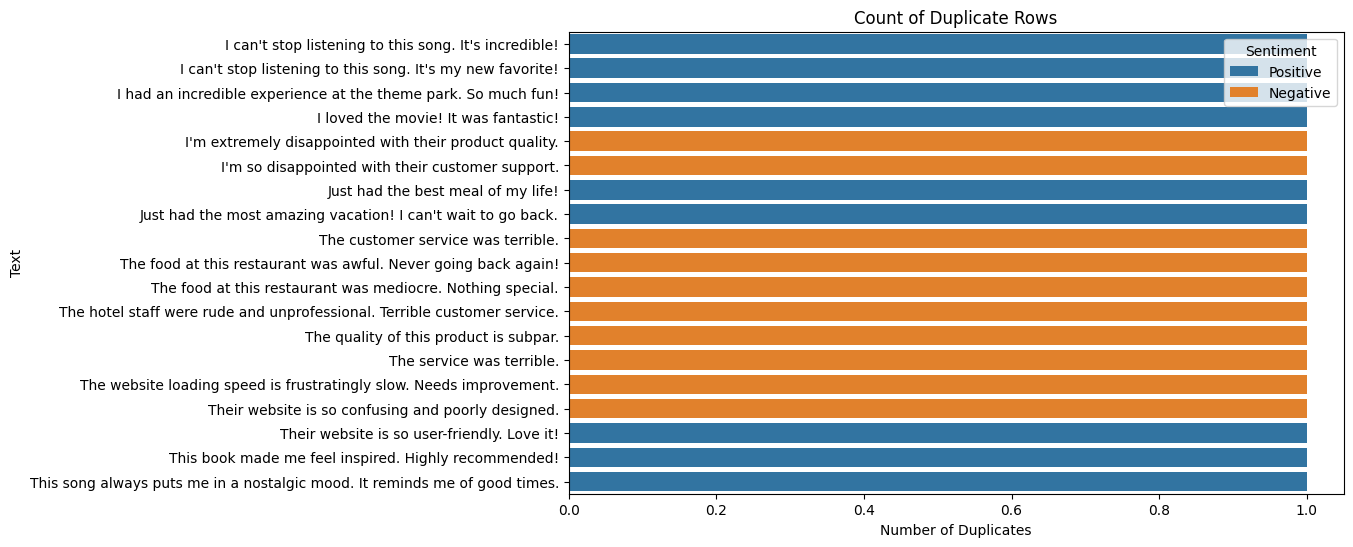

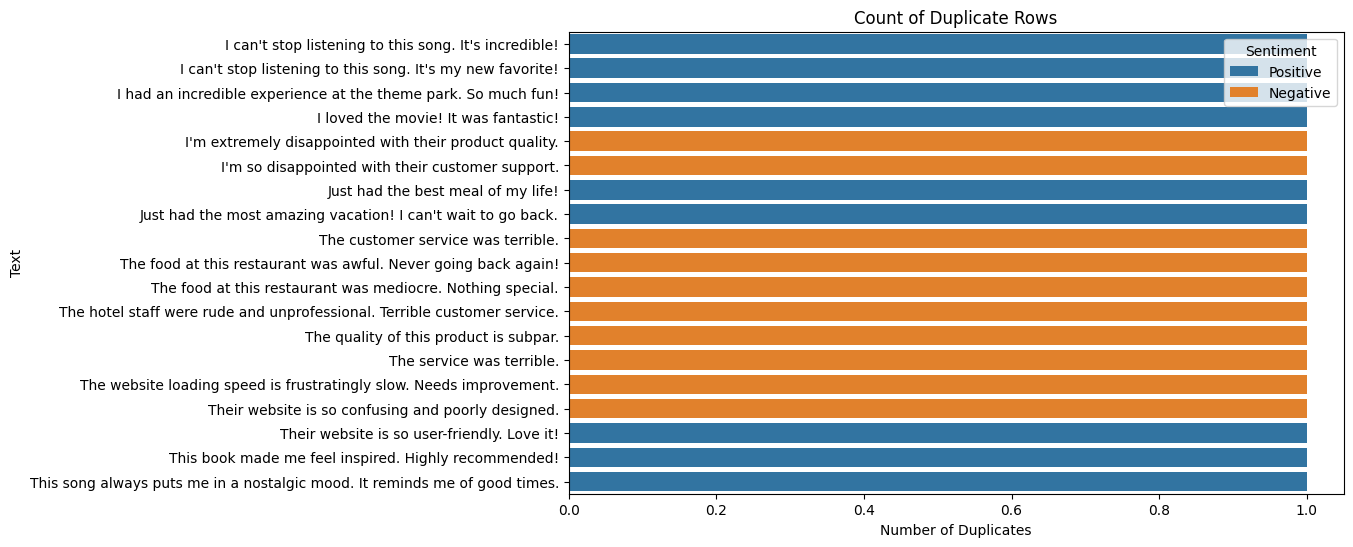

In [ ]:
# prompt: draw a barchat diagram to represent the duplicates

# Count the duplicate rows
duplicate_counts = duplicate_rows.groupby(['Text', 'Sentiment']).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Text', hue='Sentiment', data=duplicate_counts)
plt.title('Count of Duplicate Rows')
plt.xlabel('Number of Duplicates')
plt.ylabel('Text')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# To remove duplicates:
new_df.drop_duplicates(inplace=True)

In [ ]:
new_df.shape

(73, 2)

In [ ]:
df.dtypes

,0
Text,object
Sentiment,object
Source,object
Date/Time,object
User ID,object
Location,object
Confidence Score,object


In [ ]:
df["Location"].unique()

array(['New York', 'Los Angeles', 'London', 'Toronto', 'Paris',
       'San Francisco', 'Berlin', 'Sydney', 'Mumbai', 'Orlando',
       'Chicago', nan], dtype=object)

In [ ]:
# convert Location, Source,  to categorical data type

df['Location'] = df['Location'].astype('category')
df['Source'] = df['Source'].astype('category')
df.dtypes


,0
Text,object
Sentiment,object
Source,category
Date/Time,object
User ID,object
Location,category
Confidence Score,object


In [ ]:
# convert Confidence Score to float datatype

df['Confidence Score'] = df['Confidence Score'].astype(float)
df.dtypes


,0
Text,object
Sentiment,object
Source,category
Date/Time,object
User ID,object
Location,category
Confidence Score,float64


In [ ]:
# convert Date/Time to time data type

df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.dtypes


,0
Text,object
Sentiment,object
Source,category
Date/Time,datetime64[ns]
User ID,object
Location,category
Confidence Score,float64


In [ ]:
#convert Sentiment to category datatpe
df["Sentiment"] = df["Sentiment"].astype("category")

In [ ]:
df.dtypes

,0
Text,object
Sentiment,category
Source,category
Date/Time,datetime64[ns]
User ID,object
Location,category
Confidence Score,float64


In [ ]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))


In [ ]:
# Fit and transform the review text
X = vectorizer.fit_transform(new_df['Text'])


In [ ]:
# Display feature names
print("Features:", vectorizer.get_feature_names_out())

Features: ['absolutely' 'addicted' 'adrenaline' 'air' 'album' 'always' 'amazing'
 'arrived' 'art' 'artist' 'avoid' 'away' 'awe' 'awful' 'back' 'band'
 'beautifully' 'best' 'beyond' 'blowing' 'blown' 'book' 'bored' 'breath'
 'breathtaking' 'broke' 'cafe' 'calming' 'captivated' 'captivating' 'care'
 'chat' 'cluttered' 'coaster' 'concert' 'confusing' 'contagious' 'costs'
 'cruise' 'customer' 'customers' 'damaged' 'delayed' 'delicious'
 'delivery' 'design' 'designed' 'difficult' 'disappointed' 'disappointing'
 'easy' 'electrifying' 'ending' 'energizing' 'energy' 'enough' 'ever'
 'every' 'exceeded' 'excellent' 'exceptional' 'excitement' 'exhilarating'
 'expectations' 'experience' 'extremely' 'fantastic' 'favorite' 'feel'
 'fell' 'find' 'finest' 'finish' 'flat' 'flight' 'follow' 'food' 'found'
 'fresh' 'friendly' 'frustrating' 'frustratingly' 'fun' 'game' 'get' 'go'
 'going' 'good' 'great' 'hard' 'headphones' 'heart' 'helpful' 'highly'
 'hooked' 'hotel' 'impressed' 'improvement' 'incredible'

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, new_df['Sentiment'], test_size=0.25, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 54, Testing samples: 19


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict sentiment for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 84.21%
              precision    recall  f1-score   support

    Negative       0.77      1.00      0.87        10
    Positive       1.00      0.67      0.80         9

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19



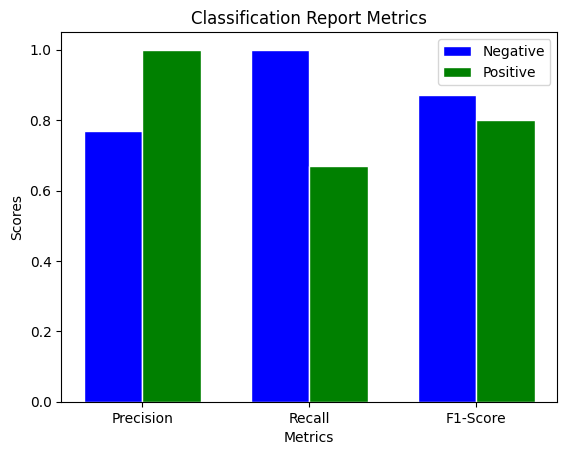

In [ ]:
import matplotlib.pyplot as plt

# Data from the classification report
metrics = ['Precision', 'Recall', 'F1-Score']
negative_scores = [0.77, 1.00, 0.87]
positive_scores = [1.00, 0.67, 0.80]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, negative_scores, color='blue', width=bar_width, edgecolor='white', label='Negative')
plt.bar(r2, positive_scores, color='green', width=bar_width, edgecolor='white', label='Positive')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.legend()

# Display the chart
plt.show()


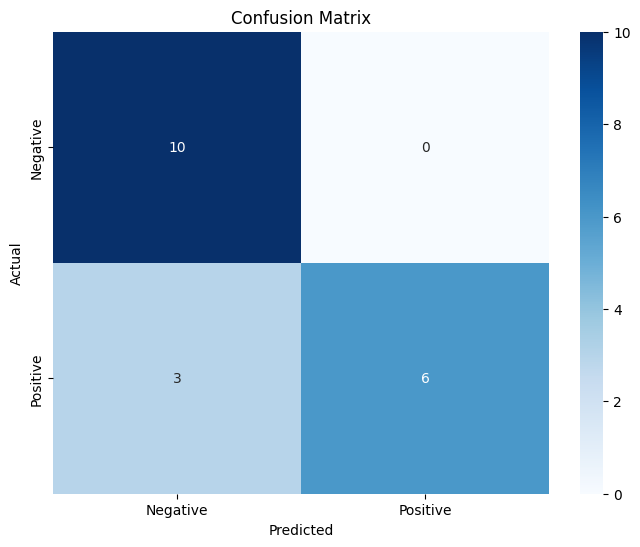

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Experiment with other algorithms like Support Vector Machines (SVM) or Decision Trees.

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier




In [ ]:
# Initialize SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Display classification report
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

    Negative       0.77      1.00      0.87        10
    Positive       1.00      0.67      0.80         9

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19



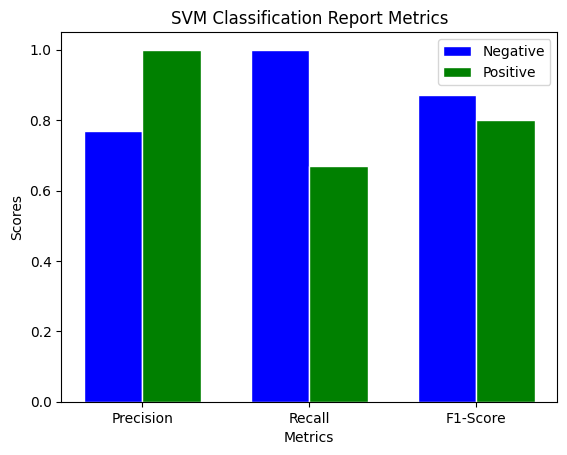

In [ ]:
# Data from the classification report for SVM
metrics = ['Precision', 'Recall', 'F1-Score']
negative_scores_svm = [0.77, 1.00, 0.87]
positive_scores_svm = [1.00, 0.67, 0.80]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, negative_scores_svm, color='blue', width=bar_width, edgecolor='white', label='Negative')
plt.bar(r2, positive_scores_svm, color='green', width=bar_width, edgecolor='white', label='Positive')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('SVM Classification Report Metrics')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.legend()

# Display the chart
plt.show()


In [ ]:
# Initialize Decision Tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Display classification report
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.631578947368421
              precision    recall  f1-score   support

    Negative       0.77      1.00      0.87        10
    Positive       1.00      0.67      0.80         9

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19



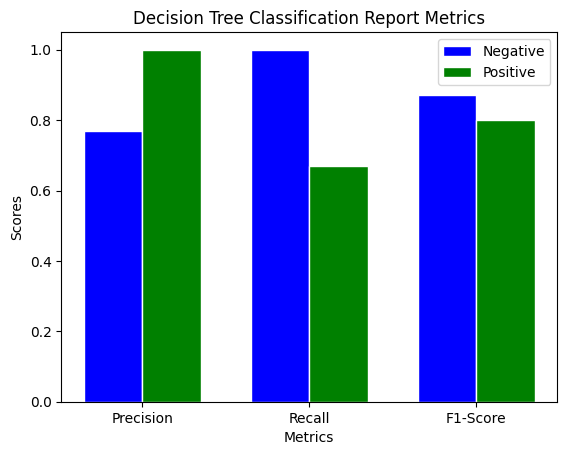

In [ ]:
# Data from the classification report for Decision Tree
metrics = ['Precision', 'Recall', 'F1-Score']
negative_scores_tree = [0.77, 1.00, 0.87]
positive_scores_tree = [1.00, 0.67, 0.80]

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot bars
plt.bar(r1, negative_scores_tree, color='blue', width=bar_width, edgecolor='white', label='Negative')
plt.bar(r2, positive_scores_tree, color='green', width=bar_width, edgecolor='white', label='Positive')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Decision Tree Classification Report Metrics')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.legend()

# Display the chart
plt.show()
